<center>
    <h1 style="padding:15px;
               color:#ffffff;
               background-color:#383373">
        EXPLORE THE CAR DATASET !!
    </h1>
</center>
<h2 style="color:gray">
    Goal of this notebook: visualise the data for better understanding
</h2><hr>
<p style="float:right;
          font-style:italic;
          text-align:right">
    made by: Fr&eacute;d&eacute;ric Cot&eacute;<br>
    in: Febuary 2019<br>
    Git: https://github.com/FredLiquidMaster<br>
    <span style="font-size:60%;
                 color:gray">
        *NOTE: the dataset is also avalable on the Git link
    </span>
</p><br>
<div style="position:absolute;letf:120px;top:170px">
    <img src="KIJIJI_LOGO.jpg" style="width:130px;height:100px;display:inline-block">
    <p style="display:inline-block">
        shout out to kijiji for letting me harvest this<br>
         info 😉 and helping me find the best car deal!!<br>
        <b>LINK HERE</b> => https://www.kijiji.ca/
        <br>
    </p>
</div>
<br><br><br><br><br><br>
<div style="border:solid 2px #383373;
            padding:10px">
    <h3 style="color:#383373">
        HISTORY OF THE DATASET
    </h3>
    <hr>
    <p>
        <h4 style="color:gray;font-size:110%">
            <u>
                Quick intro
            </u>
        </h4>
        The project started in 2017 when I decided to buy a new car. At first I was searching around on different websites and trying to make miself an idea of what car I want. While doing this i realized there is way much more information needed on the car brand than the information I see in on a car add. For example: How quick does a car lose value? Does all the cars form a same make (ex: ford) lose value a the same rithm? How many km a normal car has and at what point the Km is considered a lot?   There is a bunch of websites out there with this kind of information but a lot of them are sponsored by a make brand or only report on a particulat type of vehicule like truck or exotic cars. At last, if a website is big enough to have information on almost every car make and model, well it probably is not a from Quebec Canada and is not accurate on the maket up here. So my solution to having a clearer view of the car market in my region, I decided to harvest the information myself and analyse it to find the perfect car for me. <br><br>
        
        
        <h4 style="color:gray;font-size:110%">
            <u>
                The information I was looking for
            </u>
        </h4>
        <ul>
            <li>
                How quick cars lose value (\$/year and \$/km)?
            </li>
            <li>
                What car make and model has the lowest value lost?<br> 
            </li>
            <li>
                At what point in a car's lifetime is the best for sale? (km and year)(in case I want to sell it again in the future)
            </li>
            <li>
                What makes has the more car on sale? (the ones people don't want to keep)<br><br>
            </li>
        </ul>
    
        <h4 style="color:gray;font-size:110%">
            <u>
                Why Kijiji
            </u>
        </h4>
        To get a maximum of information, I chose to harvest on the kijiji website. I chose this one, first because its the biggest in montreal (over 30k cars). Second because when someone create a car add, he have to chose the make and the model in a list, so there can not be any spelling errors of the make and model. This gives a good advantage because trying to clean a data set with mistakes in the make and model witch are both string values, would take a lot of time and would probaly lose lots of inoformation on typos. third reason, all add have a precise AdID that alowed me to easily verify if I already had this add in bank and prevent duplication of the data.<br><br>
    </P>
    
    <br><br>
    <h3 style="color:#383373">
        STEPS OF THE EXPLORATION
    </h3>
    <hr>
    <p>
        <b>STEP 1:</b> Import/Open the dataset and look at the raw data. print the first few items<br>
        <b>STEP 2:</b> Clean the data. Keep only the good information and only the usefull 'keys'<br>
        <b>STEP 3:</b> Plot all the data then select boundarys for extreme cases and plot again<br>
        <b>STEP 4:</b> create a heatmap of the data repartition so we can clearly see 'where' is the info<br>
        <b>STEP 5:</b> Look at the repartition over the different makes<br>
        <b>STEP 6:</b> Select the biggest make and look at the repartition over its different models<br>
        <b>STEP 7:</b> Create a function to easily compare 2 model of any makes<br>
    </p>
</div>

<br><br>

<div style="border:solid 2px #383373;
            padding:10px">
    <center>
        <h3 style="padding:10px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px">
            <b>STEP 1:</b> Import/Open the dataset and look at the raw data. print the first few items
        </h3>
    </center>
</div>

In [1]:
import CarOnSaleQC_DataBase as db                      # import the fille

data = db.data_dict                                    # save the content to a variable
del db.data_dict                                       # del the fille from memory to clear space

print("THERE ARE "+str(len(data))+" ADS IN THE DB!\n") # see how long is the data dict

keylist = list(data.keys())                            # save all the keys to a list for easyer manipulation
print("First 5 keys:")                                 # view the first few dict keys
print(keylist[:5])

ii=0
print("\n === the first few items ===")
for i in keylist[:5]:                                  # look at the first few items of the dict
    print("\n === Item No ",ii)
    print(data[i])
    ii+=1

THERE ARE 35227 ADS IN THE DB!

First 5 keys:
['1005961571', '1015511929', '1018372341', '1020663405', '1023816939']
the first few items

 === Item No  0
{'adid': '1005961571', 'km': '190Â\xa0000', 'location': 'Laval/Rive Nord', 'make': 'chevrolet', 'model': 'uplander', 'price': '3499,0', 'quand': '13-f\\xe9vrier-17', 'state': 'new', 'year': '2007'}

 === Item No  1
{'adid': '1015511929', 'km': '170Â\xa0000', 'location': 'Ville de Montr\\xe9al', 'make': 'chevrolet', 'model': 'optra', 'price': '2500,0', 'quand': '13-f\\xe9vrier-17', 'state': 'new', 'year': '2005'}

 === Item No  2
{'adid': '1018372341', 'km': '217', 'location': 'Laval/Rive Nord', 'make': 'chrysler', 'model': 'sebring', 'price': '', 'quand': '03-mars-17', 'state': 'new', 'year': '2005'}

 === Item No  3
{'adid': '1020663405', 'km': '75Â\xa0000', 'location': 'Laval/Rive Nord', 'make': 'chevrolet', 'model': 'c/kpickup3500', 'price': '', 'quand': 'hier', 'state': 'new', 'year': ''}

 === Item No  4
{'adid': '1023816939', 'k

<div style="border:solid 2px #383373;
            padding:10px">
    <h3 style="padding:10px;
               padding-right;0px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px;
               margin-right:10px;
               float:left">
        <b>STEP 1:</b> &nbsp;&nbsp;&nbsp; Conclusion
    </h3>


Lot of information is missing or is not in the good format. Lets see what we have to kmow what is needed to clean the information.
<br>Fist, the  <b>'adid'</b>. We can see that the key for each add in the main data_dict is the adId witch, a string of 10 numbers. 

<br>Second, the <b>'km'</b> witch has a stange "Â" before "\\xa0" of the non breakable space. but its not a big thing since we strip everything. To manipulate the km we need to convert all the strings to integers like: '190Â\xa0000'&nbsp;->&nbsp;190. 

<br>Third, the <b>'location'</b> is verry messy because of the special char from french, for example this last one 'Ouest de l\\u2019\\xcele' should be 'ouest de l'&icirc;le'; the '&icirc;' does not exist in english. Fortunately, it is not important to include it in our analyse since there are very few different possible values this parameter can take. So we will just cut it out of the data set.

<br>Forth, the <b>'make'</b> mean the name of the compagnie who built the car. It will always be a good value because it was used as the key for the iteration during the research, it was automaticly filled by the program so there can be no human mistakes like typos. 

<br>Fifth, the <b>'model'</b> will also aways be perfect for the same reason than the make. 

<br>Six, the <b>'price'</b> is a value that is often missing because some car where on demand or the seller did not enter one. for the ones present, its a srting with a ',' for separator, but we want it as an int because the few cents have no influence on the data. something like: '6495,0'&nbsp;->&nbsp;6495&nbsp.

<br>Seventh, the <b>quand</b> for 'when', this is the date where the add was posted. It is interesting to look at the first few, but not worth keeping for the analyse. 

<br>eight, the <b>'state'</b> was a key to help during the harvesting, its is of no help. (do not confuse new for a new car) 

<br>ninth, the <b>'year'</b> for when was the car made, very usefull data and easy to convert to int and then convert to the age of the car. 



<br><br>
<b>QUICk LIST OF EXAMPLES</b>
<ul>
    <li>item 2       -> has no price</li>
    <li>item 2       -> km is only 217 whille it clearly means 270 000km</li>
    <li>item 0 and 1 -> km is format 999A\xa0000 and we want 999</li>
    <li>item 0 and 1 -> price has format 999,0 and we want 999</li>
</ul>
    
</div>

<br><br>

<div style="border:solid 2px #383373;
            padding:10px">
    <center>
        <h3 style="padding:10px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px">
            <b>STEP 2:</b> Clean the data. Keep only the good information and only the usefull 'keys'
        </h3>
    </center>
</div>

In [2]:
def cleaner(item, cleanList):
    goodItem = [False,False,False]                     # if its all good the item will be added to the list
    
    theKm = item['km']                                 # let's start with the KM   
    try:                                               # try convert it to a int, maybe its already format 999.
        theKm = int(theKm) 
        goodItem[0] = True                             # if it works, we mark the KM as good
    except ValueError:                                 # if there is an error the format probably is 999A\xa0000.
        if(len(theKm) > 3):
            try:
                indexOfA = theKm.find("Â")             # strip everything up to the A
                theKm = int(theKm[:indexOfA])          # try to convert again
                goodItem[0] = True                     # if it works, we mark the KM as good
            except ValueError:                         # if not we give up on this one and go to the next
                x = "nothing"
                
    if(goodItem[0] == True):
        theYear = item['year']                         # next we do the year
        try:
            theYear = int(theYear)                     # try convert it to an int
            if(theYear < 1000):                        # check if the format is 99 or 1999
                if(theYear<100):  
                    theYear = int('19'+str(theYear))   # if its 99 and lower we add '19' before
                else:
                    theYear = int('20'+str(theYear))   # else we add '20'
            theAge = 2017 - theYear
            if(theAge >= 0):                           # the age can't be negative
                goodItem[1] = True                     # if it works we mark the year as good
        except ValueError:                             # if it doesnt work we give up on this one
            x = "nothing"
    
    if(goodItem[1]==True):
        thePrice = item['price']                       # last we do the price
        try:
            indexOfcoma = thePrice.find(',')           # find the index of the ','
            thePrice = thePrice[:indexOfcoma]          # strip everything after the ','
            thePrice = int(thePrice)                   # try convert it to an int
            goodItem[2] = True                         # if it works we mark the price as good
        except ValueError:                             # if it doesnt work we give up on this one
            x = "nothing"
    
    if(goodItem == [True, True, True]):                # if all the info is good we add it to the clean list
        cleanItem = [item['make'],
                     item['model'],
                     theKm,
                     theAge,
                     thePrice]                         # create a clean item for the list
        cleanList.append(cleanItem)                    # add it to the clean list



Now we have this function, lets use it to clean the dict
    - iterate over the list and pass every item in the function

In [3]:
theCleanList = []
for adId in keylist:                                   # for every Id
    theItem = data[adId]                               # select the information at this Id
    cleaner(theItem, theCleanList)                     # send it to the cleaner function
    
print("len of CleanList  :"+str(len(theCleanList)))    # affiche la longeur du new list
print("the first 3 items :")                           # affiche les 3 premiers items de la liste
for item in range(3):
    print(" === the Item "+str(item))
    print(theCleanList[item])

len of CleanList  :32817
the first 3 items :
 === the Item 0
['chevrolet', 'uplander', 190, 10, 3499]
 === the Item 1
['chevrolet', 'optra', 170, 12, 2500]
 === the Item 2
['ford', 'mustang', 190, 17, 6495]


<div style="border:solid 2px #383373;
            padding:10px">
    <h3 style="padding:10px;
               padding-right;0px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px;
               margin-right:10px;
               float:left">
        <b>STEP 2:</b> &nbsp;&nbsp;&nbsp; Conclusion
    </h3>

this looks perfectly clean, we can try to see something out of this to spot other missleading info
    - first lets try to plot all the price against the age
    - then all the prices againts the km
</div>

<br><br>
    
<div style="border:solid 2px #383373;
            padding:10px">
    <center>
        <h3 style="padding:10px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px">
            <b>STEP 3:</b> Plot all the data then select boundarys for extreme cases and plot again
        </h3>
    </center>
</div>

In [4]:
kmList = []                                           # lets create a list of all km
yearList = []                                         # same for the year and the price
priceList = []
for item in theCleanList:                             # iterate over every item of theCleanList
    kmList.append(item[2])                            # assing the values to the right list
    yearList.append(item[3])
    priceList.append(item[4])
    
import matplotlib.pyplot as plt                       # import the module for ploting graphs
import numpy as np

def showFig(x,y,title,xName,yName,regress = "n"):
    fit = np.polyfit(x,y,1)
    poly = np.polyval(fit, x)
    plt.plot(x,y,"o")
    if(regress == "y"):
        plt.plot(x,poly,"r--")
    plt.xlabel(xName) 
    plt.ylabel(yName)
    plt.title(title)
    plt.show()

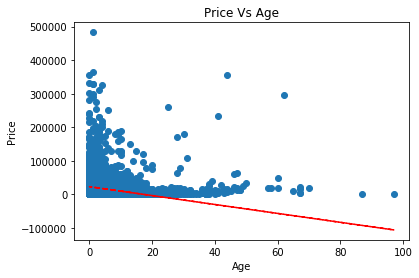

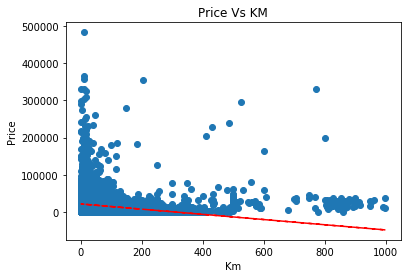

In [5]:
showFig(yearList, priceList,
        "Price Vs Age",
        "Age", "Price","y")

showFig(kmList, priceList,
        "Price Vs KM",
        "Km", "Price","y")

<div style="border:solid 2px #383373;
            padding:10px">
    <h3 style="padding:10px;
               padding-right;0px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px;
               margin-right:10px;
               float:left">
        <b>STEP 3:</b>
    </h3>
Here we can see how cars lose value</b> as the Km goes up and as they get holder (the normal stuff). But we dont have a clear view of the repartition. To have a better view we will cut some of the values:
 - we cut all car with price over 100k
 - we cut all car with km over 400(k)
 - we cut ever car with age over 20
lets rewrite the little list making block and add the conditions

</div>

In [15]:
kmList = []                                           # lets create a list of all km
yearList = []                                         # same for the year and the price
priceList = []
for item in theCleanList:                             # iterate over every item of theCleanList
    if(item[2]<400 and item[3]<20 and item[4]<100000):# verrify the condition                       
        kmList.append(item[2])                        # assing the values to the right list
        yearList.append(item[3])
        priceList.append(item[4])

filteredDataLen = len(priceList)

def getAvgPriceAgeList(yearList, priceList):
    yearDict = {}
    for i in range(len(priceList)):
        if(yearList[i] not in yearDict.keys()):
            yearDict[yearList[i]] = [priceList[i]]
        else:
            yearDict[yearList[i]].append(priceList[i])

    yearAvgPriceList = []
    for i in range(len(yearDict)):
        if(len(yearDict[i])!=0):
            avgForI = sum(yearDict[i]) / len(yearDict[i])
        yearAvgPriceList.append(avgForI)
    return yearAvgPriceList

New len of data :32133


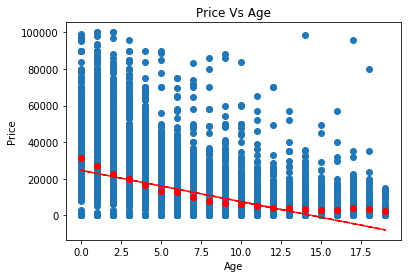

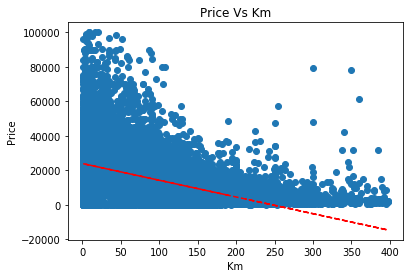

In [7]:
print("New len of data :"+str(filteredDataLen))        # print the new len after the selection

def showFigWithAvg(x,y,
                   title,xName,yName,
                   regress = "n"):
    fit = np.polyfit(x,y,1)
    poly = np.polyval(fit, x)
    plt.plot(x,y,"o")
    if(regress == "y"):
        plt.plot(x,poly,"r--")
    avgList = getAvgPriceAgeList(x,y)
    plt.plot([x for x in range(len(avgList))],
            avgList, "or")
    plt.xlabel(xName) 
    plt.ylabel(yName)
    plt.title(title)
    plt.show()
    
showFigWithAvg(yearList,priceList,
                "Price Vs Age",
                "Age", "Price", "y")

showFig(kmList, priceList,
        "Price Vs Km",
        "Km", "Price", "y")


<div style="border:solid 2px #383373;
            padding:10px">
    <h3 style="padding:10px;
               padding-right;0px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px;
               margin-right:10px;
               float:left">
        <b>STEP 3:</b> &nbsp;&nbsp;&nbsp; Conclusion
    </h3>
Cool Cool! The data still look prety crowded but dont forget there are over 30K points in every graph. With these clearer data we can find some statistics on this information!
     - average price of a car
     - average km of a car
     - average km/year a car does
</div>

<br><br>

<div style="border:solid 2px #383373;
            padding:10px">
    <center>
        <h3 style="padding:10px;
               color:#ffffff;
               background-color:#383373;
               margin-top:0px">
            <b>STEP 1:</b> Import/Open the dataset and look at the raw data. print the first few items
        </h3>
    </center>
</div>

In [8]:
nbData = len(kmList)                                  # take note of the amount of good data we have at this point 
avgKm    = sum(kmList) / nbData                       # calculate the average Km 
avgPrice = sum(priceList) / nbData                    # calculate the average price

kmVsAgeList = []
for i in range(nbData):                               # itearte over every car to find its Km/year
    if(yearList[i] != 0):                             # make sure we dont divide by zero
        kmVsAgeList.append(kmList[i] / yearList[i])   # calculate the km/year
    else:
        kmVsAgeList.append(kmList[i])
        
avgKmYear = sum(kmVsAgeList) / nbData                 # calculate the average 

print("average price of a car   :"+str(avgPrice)+" $ (CAD)")
print("average km of a car      :"+str(avgKm *1000)+" KM")
print("average km/year of a car :"+str(avgKmYear * 1000)+" KM/YEAR")

average price of a car   :13769.312358012012 $ (CAD)
average km of a car      :104880.30996172159 KM
average km/year of a car :18186.859695467734 KM/YEAR


Now that we have an idea of what the information looks like, we can dig further and try to open the information relative to a certain make or model
    - first lets see how many add in avg every make has.
    - then we will chose the one with the more adds 

There are 50 different make
The avg add for every make :656.34
The biggets make is        :toyota
The biggest has            :3170 adds


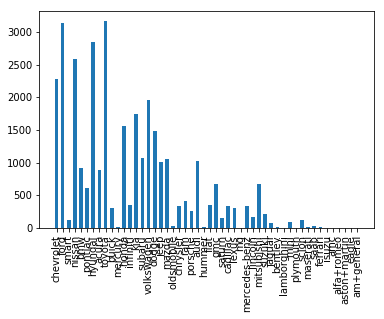

In [9]:
def generateMakeDict(itemList):                       # create a function to generate a new dict and alow easier manipulation
    theMakeDict = {}                 
    for item in itemList:                             # iterate over all the items in the item List
        if(item[0] not in theMakeDict):               # if there is no keys yet for this make
            theMakeDict[item[0]] = [item]             # we create the new key for this make
        else:
            theMakeDict[item[0]].append(item)         # if there is already a key for this make we just ad the item to the list
    return theMakeDict                                # return this new Dict

makeDict = generateMakeDict(theCleanList)             # Run the preceiding function to generate the famous dict
nbMakes = len(makeDict)                               # Save the len of the new data set
print("There are "+str(nbMakes)+" different make")

makeList = list(makeDict.keys())                      # save all the keys into a list for easier manipulation
makeSize = []        
for make in makeDict:                                 # iterate over every make and extract the length
    makeSize.append(len(makeDict[make]))

avgMakeSize = sum(makeSize) / nbMakes                                                 # calculate the average len of every make
indexOfTheBiggetsMake = makeSize.index(max(makeSize))                                 # extract index of the beggest make
theLargestMake = makeList[indexOfTheBiggetsMake]                                      # save the name of the biggest make
print("The avg add for every make :"+str(avgMakeSize))
print("The biggets make is        :"+theLargestMake)
print("The biggest has            :"+str(makeSize[indexOfTheBiggetsMake])+" adds")    # extract and print the size of biggest make

makeSize = []
for make in makeList:
    makeSize.append(len(makeDict[make]))
    
plt.bar(makeList, makeSize,width=0.6)
plt.xticks(rotation=90)
plt.show()

<b style="color:blue">Interesting</b> to find a car from the amc make.. didn't even know it exist! for my own interest lets go see what the info looks like. I will also google it to find more informations before i continue hehehe

In [10]:
print("The informations of the first lamborghini make car:")
print("Model of the car :"+str(makeDict['lamborghini'][0][1]))
print("Age of the car   :"+str(makeDict['lamborghini'][0][3])+" years")
print("Km of the car    :"+str(makeDict['lamborghini'][0][2])+" 000 km")
print("Price of the car :"+str(makeDict['lamborghini'][0][4])+" $ (CAD)")

The informations of the first lamborghini make car:
Model of the car :gallardo
Age of the car   :4 years
Km of the car    :18 000 km
Price of the car :219900 $ (CAD)


<b style="color:blue">Well kind of boring</b>, its just worth 5650 CAD it could have ben some semi exotic colection car since there is only one.. but also dont forget that we took of all the cars worth more than 100K CAD so i guess the real exotic cars are gone in this sorting. Now that we have found what make has the more adds, we can plot the graph to see more about the toyotas on sale
    - Price vs Age -> for Toyota
    - Price vs Km  -> for Toyota

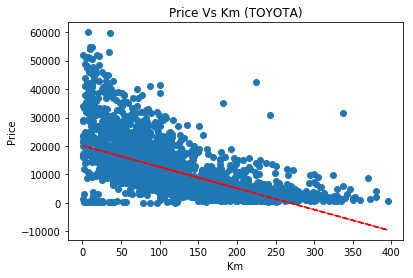

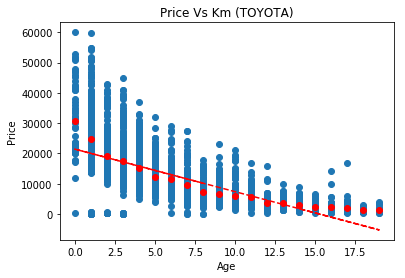

In [11]:
toyotaPrice = []                                      # this is the exact same block than earlier except it is passed
toyotaKm    = []                                      # on the 'toyota' fold of the dictionnary
toyotaAge   = []
for item in makeDict['toyota']:
    if(item[2]<400 and item[3]<20 and item[4]<60000): # The sorting contitions are the same except the max price has ben 
        toyotaPrice.append(item[4])                   # lowered to 60000 $ CAD
        toyotaKm.append(item[2])
        toyotaAge.append(item[3])                     # all this toyota info in placed in new lists ready for ploting
nbOfToyotaGoodToyota = len(toyotaPrice)               # store the len in a variable for quick acces

showFig(toyotaKm, toyotaPrice,
        "Price Vs Km (TOYOTA)",
        "Km","Price","y")


showFigWithAvg(toyotaAge, toyotaPrice,
        "Price Vs Km (TOYOTA)",
        "Age", "Price", "y")

<b style="color:blue">On the last 2 chart</b> we can see a clear cluster in the lower left. These items are ads of almost new car on location. Where the price is montly payment (in canada th montly payment for a toyota is way under 1000 CAD) and the age is very low. It is a little more difficut to see on the Price Vs Km chart because some of them really have a km < 400 because they are new! so this is an other 'false information' hidden into the data. We could take out the add that respond to some criteria to adjust the data but wont do it. Because the boundary is not aways this clear and sometime we risk injecting a biggest error. Also if the are to be used i supervides ML the model has to addapt to this missleading info.<br><hr>
<b style="color:blue">We want to see better!</b> so now that we can see the curves, we want to see how the data is distributed inside of the big cluster.. so lets try to heat map the information of the charts..
    - we have to split the chart in a grid, and for every square, calculate how many items in there. to do this we need a function to witch we send an item and it place it in the good box (i,j)

In [12]:
def placeInGrid(price,km,age,priceStep,kmStep,ageStep,vsKmGrid,vsAgeGrid):
        j           = int(price / priceStep)
        vsKmGrid_i  = int(km / kmStep)
        vsAgeGrid_i = int(age / ageStep)
        
        vsKmGrid[vsKmGrid_i,j]   += 1
        vsAgeGrid[vsAgeGrid_i,j] += 1

In [13]:
vsKmGrid  = np.zeros((20,20))
vsAgeGrid = np.zeros((20,20))

for i in range(nbOfToyotaGoodToyota):
    placeInGrid(toyotaPrice[i],
               toyotaKm[i],
               toyotaAge[i],
               3000,
               20,
               1,
               vsKmGrid,
               vsAgeGrid)

vsKmGrid = vsKmGrid/nbOfToyotaGoodToyota * 100
vsAgeGrid = vsAgeGrid/nbOfToyotaGoodToyota * 100

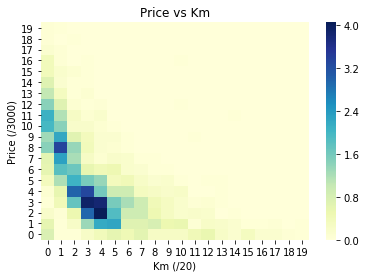

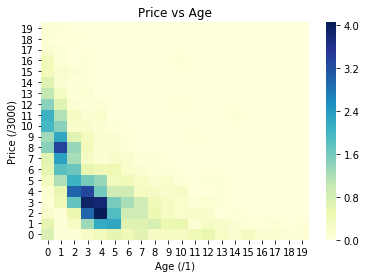

In [14]:
import seaborn as sns

fig1 = sns.heatmap(vsKmGrid, cmap="YlGnBu")
fig1.invert_yaxis()
plt.xlabel("Km (/20)")                                      # add the axis names
plt.ylabel("Price (/3000)")
plt.title("Price vs Km")                                    # add a Graph title
plt.show()

fig2 = sns.heatmap(vsKmGrid, cmap="YlGnBu")
fig2.invert_yaxis()
plt.xlabel("Age (/1)")                                     # add the axis names
plt.ylabel("Price (/3000)")
plt.title("Price vs Age")                                  # add a Graph title
plt.show()

hmm ok